In [10]:
#import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
%matplotlib inline

In [3]:
#import orders data frame
orders = pd.read_csv("./data/Orders.csv")

Problem 1: Check Sales and Profit columns, convert them to numeric type

In [49]:
orders.head()

,Row.ID,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Postal.Code,City,...,Product.ID,Category,Sub.Category,Product.Name,Sales,Quantity,Discount,Profit,Shipping.Cost,Order.Priority
0,40098,CA-2014-AB10015140-41954,11/11/14,11/13/14,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,TEC-PH-5816,Technology,Phones,Samsung Convoy 3,$221.98,2,0.0,$62.15,40.77,High
1,26341,IN-2014-JR162107-41675,2/5/14,2/7/14,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,FUR-CH-5379,Furniture,Chairs,"Novimex Executive Leather Armchair, Black","$3,709.40",9,0.1,-$288.77,923.63,Critical
2,25330,IN-2014-CR127307-41929,10/17/14,10/18/14,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,...,TEC-PH-5356,Technology,Phones,"Nokia Smart Phone, with Caller ID","$5,175.17",9,0.1,$919.97,915.49,Medium
3,13524,ES-2014-KM1637548-41667,1/28/14,1/30/14,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,...,TEC-PH-5267,Technology,Phones,"Motorola Smart Phone, Cordless","$2,892.51",5,0.1,-$96.54,910.16,Medium
4,47221,SG-2014-RH9495111-41948,11/5/14,11/6/14,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,...,TEC-CO-6011,Technology,Copiers,"Sharp Wireless Fax, High-Speed","$2,832.96",8,0.0,$311.52,903.04,Critical


In [4]:
orders.Sales = orders.Sales.str.replace('[$,]', '').astype('float')

In [5]:
orders.Profit = orders.Profit.str.replace('[$,]', '').astype('float')

In [52]:
orders.head()

,Row.ID,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Postal.Code,City,...,Product.ID,Category,Sub.Category,Product.Name,Sales,Quantity,Discount,Profit,Shipping.Cost,Order.Priority
0,40098,CA-2014-AB10015140-41954,11/11/14,11/13/14,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,TEC-PH-5816,Technology,Phones,Samsung Convoy 3,221.98,2,0.0,62.15,40.77,High
1,26341,IN-2014-JR162107-41675,2/5/14,2/7/14,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,FUR-CH-5379,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.40,9,0.1,-288.77,923.63,Critical
2,25330,IN-2014-CR127307-41929,10/17/14,10/18/14,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,...,TEC-PH-5356,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.17,9,0.1,919.97,915.49,Medium
3,13524,ES-2014-KM1637548-41667,1/28/14,1/30/14,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,...,TEC-PH-5267,Technology,Phones,"Motorola Smart Phone, Cordless",2892.51,5,0.1,-96.54,910.16,Medium
4,47221,SG-2014-RH9495111-41948,11/5/14,11/6/14,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,...,TEC-CO-6011,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.96,8,0.0,311.52,903.04,Critical


Convert the Date columns to datetime objects

In [6]:
orders['Order.Date'] = pd.to_datetime(orders['Order.Date'])

In [7]:
orders['Ship.Date'] = pd.to_datetime(orders['Ship.Date']) 

In [8]:
plot1 = orders[['Order.Date', 'Quantity']].groupby('Order.Date').sum()

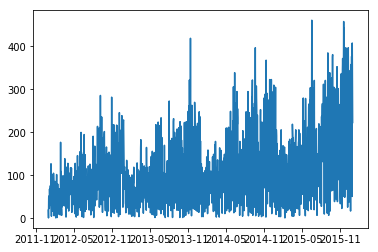

In [11]:
plt.plot(plot1)

The graph definitely show an increase in inventory in the winter months. Also, sales have been increasing between 2011-2015

In [16]:
plot2 = orders[['Order.Date', 'Category', 'Quantity']].groupby(['Category', 'Order.Date']).sum()

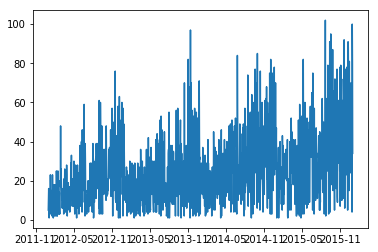

In [32]:
#Plot of furniture
plt.plot(plot2.loc[plot2.index.levels[0][0]])


Plot of Seasonal trend for furniture

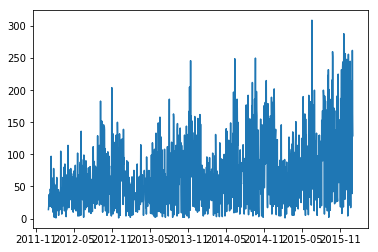

In [34]:
#plot of office supplies
plt.plot(plot2.loc[plot2.index.levels[0][1]])

Plot of seasonal trend for office supplies

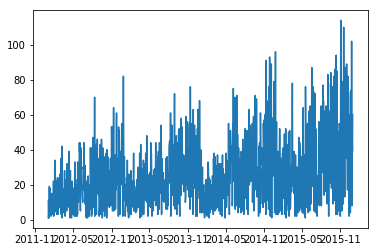

In [36]:
#plot of technolocy
plt.plot(plot2.loc[plot2.index.levels[0][2]])

Plot of seasonal trend for techonology

In [37]:
#import returns data frame
returns = pd.read_csv('./data/Returns.csv')
returns.head()

,Returned,Order ID,Region
0,Yes,CA-2012-SA20830140-41210,Central US
1,Yes,IN-2012-PB19210127-41259,Eastern Asia
2,Yes,CA-2012-SC20095140-41174,Central US
3,Yes,IN-2015-JH158207-42140,Oceania
4,Yes,IN-2014-LC168857-41747,Oceania


In [42]:
returns.columns = ['Returned', 'Order.ID', 'Region']

In [45]:
retOrd = pd.merge(orders, returns, how = 'left', on = 'Order.ID')

In [50]:
returns.Returned.unique()

array(['Yes'], dtype=object)

In [51]:
retOrd.Returned.loc[retOrd.Returned.isna()] = list(map(lambda x: 'No', retOrd.Returned.loc[retOrd.Returned.isna()]))

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [52]:
retOrd.Returned

0         No
1         No
2         No
3         No
4         No
5         No
6         No
7         No
8         No
9         No
10        No
11        No
12        No
13        No
14        No
15        No
16        No
17        No
18        No
19        No
20        No
21        No
22        No
23        No
24        No
25        No
26       Yes
27        No
28        No
29        No
        ... 
51260     No
51261     No
51262     No
51263     No
51264     No
51265     No
51266     No
51267     No
51268     No
51269     No
51270     No
51271     No
51272     No
51273     No
51274     No
51275     No
51276     No
51277     No
51278     No
51279     No
51280     No
51281     No
51282     No
51283     No
51284     No
51285     No
51286     No
51287     No
51288     No
51289     No
Name: Returned, Length: 51290, dtype: object

In [53]:
retOrd.head()

,Row.ID,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Postal.Code,City,...,Sub.Category,Product.Name,Sales,Quantity,Discount,Profit,Shipping.Cost,Order.Priority,Returned,Region_y
0,40098,CA-2014-AB10015140-41954,2014-11-11,2014-11-13,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,Phones,Samsung Convoy 3,221.98,2,0.0,62.15,40.77,High,No,NaN
1,26341,IN-2014-JR162107-41675,2014-02-05,2014-02-07,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,Chairs,"Novimex Executive Leather Armchair, Black",3709.40,9,0.1,-288.77,923.63,Critical,No,NaN
2,25330,IN-2014-CR127307-41929,2014-10-17,2014-10-18,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,...,Phones,"Nokia Smart Phone, with Caller ID",5175.17,9,0.1,919.97,915.49,Medium,No,NaN
3,13524,ES-2014-KM1637548-41667,2014-01-28,2014-01-30,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,...,Phones,"Motorola Smart Phone, Cordless",2892.51,5,0.1,-96.54,910.16,Medium,No,NaN
4,47221,SG-2014-RH9495111-41948,2014-11-05,2014-11-06,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,...,Copiers,"Sharp Wireless Fax, High-Speed",2832.96,8,0.0,311.52,903.04,Critical,No,NaN


In [57]:
retOrd[['Profit', 'Returned']].groupby('Returned').sum()

,Profit
Returned,
No,1406085.92
Yes,61370.75


We lost $61370.75 in profits due to returns 

In [155]:
plot3 = retOrd.loc[retOrd['Returned'] == 'Yes', ['Customer.Name', 'Returned']].groupby(['Customer.Name']).count()


In [162]:
len(plot3[plot3['Returned'] > 1])

448

448 customers returned more than once

In [163]:
len(plot3[plot3['Returned'] > 5])

124

124 customers returned more than 5 times

In [172]:
retOrd.loc[retOrd['Returned'] == 'Yes', ['Returned', 'Region_x']].groupby(['Region_x']).count().sort_values(by = 'Returned', ascending = False).head()

,Returned
Region_x,
Central America,248
Western Europe,233
Western US,177
Oceania,154
Southeastern Asia,140


The top five regions with most returns are Central America, Western Europe, Western US, Oceania, and Southeast Asia

In [175]:
retOrd.loc[retOrd['Returned'] == 'Yes', ['Sub.Category', 'Returned']].groupby('Sub.Category').count()\
.sort_values(by = 'Returned', ascending = False).head()

,Returned
Sub.Category,
Binders,269
Art,217
Storage,212
Paper,150
Chairs,147


The top five sub-categories that is most likely to be returned are Binders, Art, Storage, Paper and Chairs